# Homework Answers: CSV Data Review, Tuples, Pandas Intro

At the end of the Python bootcamp, you were analysing csv files.  This is the first step for most data analysis.

In this lesson, we will add a few more tools to your concepts, including tuples and sets. Then we will briefly introduce the basic tool for data analysis of multi-column datasets in Python, the pandas library.

First...

In order to read a file into the notebook, it must be in the same directory (or "folder") as the notebook you are running. You can see what files you have by using "ls":

In [4]:
ls

Course Intro and Review.ipynb          Untitled1.ipynb
Course Policies.pdf                    Week1 Lesson-Answers.ipynb
Notebook Tips! PLEASE READ.html        Week1 Lesson-Answers.py
Notebook Tips! PLEASE READ.ipynb       Week1 Lesson_InClass.ipynb
Notebook Tips! PLEASE READ.pdf         data/
Notebook Tips! PLEASE READ_Copy.ipynb  data.zip
NotebookBasics.pdf                     grading/
Untitled.ipynb


My data is in the folder data, so we can list that and see the files:

In [5]:
ls data

goog.csv*             saved_goog.csv
more_data.csv         saved_goog_highs.csv


Let's load that file into python, using a recommended construction we didn't discuss in the bootcamp, and count the rows while we do that:

In [2]:
with open("data/goog.csv", errors="ignore") as file:
    rowCounter = 0
    for row in file:
        print(row)
        rowCounter += 1  # add one to the counter for each row

Date,Open,High,Low,Close,Volume

2010-01-04,313.16,314.44,311.81,313.06,

2010-01-05,313.28,313.61,310.46,311.68,

2010-01-06,312.62,312.62,302.88,303.83,

2010-01-07,304.4,304.7,296.03,296.75,

2010-01-08,295.7,301.32,294.26,300.71,

2010-01-11,301.93,301.93,296.72,300.25,

2010-01-12,298.74,298.78,293.71,294.94,

2010-01-13,287.96,293.9,286.66,293.25,

2010-01-14,291.66,296.8,291.11,294.63,

2010-01-15,295.5,296.48,288.73,289.71,

2010-01-19,290.45,294.91,287.86,293.52,

2010-01-20,292.7,292.7,287.36,289.91,

2010-01-21,291.43,293.12,285.84,291.2,

2010-01-22,281.97,285.01,267.16,274.73,

2010-01-25,273.02,274.66,267.49,269.73,

2010-01-26,268.72,274.53,267.88,270.94,

2010-01-27,270.36,273.55,267.39,270.78,

2010-01-28,271.97,273.23,265.03,266.88,

2010-01-29,268.98,270.22,262.54,264.71,

2010-02-01,267.03,267.64,264.88,266.24,

2010-02-02,267.21,267.21,263.54,265.29,

2010-02-03,264.07,270.78,263.85,270.14,

2010-02-04,268.23,268.73,262.52,263.13,

2010-02-05,263.94,266.48,260.97,2

In [7]:
print("There are", rowCounter, "rows in this data.")

There are 1258 rows in this data.


What are some things we might want to know about this stock data?
Maybe:
    
* highest value
* lowest value
* largest volume
* biggest difference in a single day (high-low)

You've done some of those things in the bootcamp when you looked for longest and shortest names.  We didn't save the data when we read it in.  We need to assign it to a variable.  I'll make a function to read and return that value.

In [3]:
def read_data(filename):
    # Function takes file path, and returns a list of the rows of the data
    data = []
    with open(filename, errors="ignore") as file:
        for row in file:
            data.append(row)
    return data

In [6]:
mydata = read_data("data/goog.csv")

In [10]:
len(mydata)

1258

In [5]:
mydata[0]

'Date,Open,High,Low,Close,Volume\n'

In [7]:
headers = mydata[0]

In [8]:
# Let's get rid of the first row using a slice operation to skip the first item
mydata = mydata[1:]

In [9]:
mydata[0]

'2010-01-04,313.16,314.44,311.81,313.06,\n'

In [14]:
len(mydata)

1257

Now let's make a function to find the highest value.  The question is which value do we check?  Let's just look at the High value.  But to make this general, let's just pass in the index of the column we want to check.  That way it's easy to check other columns!


In [15]:
def get_highest(data, column):
    highest = 0
    for row in data:
        # we have to split it up by the comma, to use the column index:
        vals = row.split(",")
        if vals[column] > highest:
            highest = vals[column]
    return highest

In [16]:
get_highest(mydata,2)

TypeError: unorderable types: str() > int()

The errors says it's a type error.  Remember, we read in text data.  We have to convert it to numbers to compare them!  There are decimals in stock data, so we want to make them floats.

In [ ]:
def get_highest(data, column):
    highest = 0
    for row in data:
        vals = row.split(",")
        if float(vals[column]) > highest:
            highest = float(vals[column])
    return highest

In [ ]:
get_highest(mydata, 2)

### Homework Question 1:
Write the function called "get_lowest", and make it similar. It should take the same arguments, the data set and the column number. Show it working with the column index for Low. 

Hint: set the initial value of your variable to float("inf"), which is infinity.

Your answer to q1:---------------------

**NOTE: lots of you didn't use the right index for Low.  Definitely pay attention to the directions! I added a variable above to store the headers so you can see them here again:**

 **NOTE: Some of you missed the tip about float("inf") at the end of class. Don't set a hard-coded number like 519 or anything else you think might be large enough. That's dangerous.**
 
**NOTE: Don't leave in your debug print statements in your final work.**

In [10]:
headers

'Date,Open,High,Low,Close,Volume\n'

In [18]:
# fix this so it does as required above
def get_lowest(data, column):
    # initialize to the biggest possible number, infinity
    lowest = float("inf")
    for row in data:
        vals = row.split(",")
        if float(vals[column]) < lowest:
            lowest = float(vals[column])
    return lowest

In [12]:
#show it working with the Low column number
get_lowest(mydata, 3)

216.6

moving on...--------------------------------

### Homework Question 2:

Now write a function that calculates the difference between the day's open and close stock price, and return it. Name your function "get_difference". It should take as argument a row of the dataset.

Your answer to q2:--------------------------


** NOTE: Some of you missed the hint on the Forum about how to do the row part. Remember, you can call a function with an argument that is a slice from a dataset! The idea here is to write a minimal function that works on a single row, and doesn't require reference to the complete dataset.  Some of you did open-close, others did close-open (which I prefer), but I took both.  There is also a forum hint about how to round the result, but it wasn't required.**

In [16]:
def get_difference(row):
    vals = row.split(",")
    difference = float(vals[4]) - float(vals[1])
    return difference

In [14]:
#Show it working on a row in the mydata dataset:

In [17]:
get_difference(mydata[19])

-0.7899999999999636

moving on...------------------------------

## Tuples: Let's Return the Date, too

We didn't talk about "tuples" in the bootcamp, but they are like short lists.  We use parentheses to indicate them: (item1, item2).  We can use a tuple to return the date too.  We index the values the same way we do with lists, 0 for the first item and 1 for the second, etc.

Please read this on tuples: https://www.tutorialspoint.com/python/python_tuples.htm .
[Note that it was written in Python 2 -- the difference is in the print statement.  In Python 3, we use `print(thing)`, in Python 2, `print thing`.]

Then read the chapter in Trinket, to remind yourself of the dictionaries .items() and .keys() as well, which return tuples: https://books.trinket.io/pfe/10-tuples.html

In [97]:
def get_highest_with_date(data, column):
    # take a list of rows and a column number, then return a tuple pair
    highest = (0,0)
    for row in data:
        vals = row.split(",")
        # remember these are the cols: 'Date,Open,High,Low,Close,Volume\n'
        if float(vals[column]) > highest[1]:
            # we check the value in the second element using highest[1].
            # then we assign the tuple to highest, using parens.  vals[0] is the date!
            highest = (vals[0], float(vals[column]))
    # now we return the tuple
    return highest

In [94]:
get_highest_with_date(mydata, 1)

('2014-03-07', 612.79)

In [95]:
get_highest_with_date(mydata, 3)  # using the 4th column instead...

('2014-03-06', 608.69)

If we want to use the results from the function, we must save to a variable or variables:
    

In [98]:
date, value = get_highest_with_date(mydata, 1)

In [102]:
print("The date of the highest value was {}".format(date))
print("The highest value was {}".format(value))

The date of the highest value was 2014-03-07
The highest value was 612.79


You can also save them into a single variable, but the resulting variable will still be a tuple:
    

In [103]:
results = get_highest_with_date(mydata, 1)

In [104]:
type(results)

tuple

In [106]:
print(results[0])

2014-03-07


### Homework Question 3

Rewrite your get_lowest function to return a tuple with the date of the lowest, as well as the closing value on that date.  Name your function "get_lowest_with_date".  It should take 2 arguments, the dataset and the column number for the lowest.

Your answer to q3: ------------------------------------

**NOTE: In class I gave the hint that you can use float("inf") for your initial value for the lowest.  That's infinity large, so anything else will be lower than it when you compare. You can use that here too, but in part of the tuple.  The other part can be anything you want, because you're replacing it with a string for the date value.

In [19]:
def get_lowest_with_date(data, column):
    #  I'm using the second element of the tuple for the lowest value, so it starts at infinity
    lowest = (0,float("inf"))
    for row in data:
        vals = row.split(",")
        # remember these are the cols: 'Date,Open,High,Low,Close,Volume\n'
        if float(vals[column]) < lowest[1]:
            # we check the value in the second element using highest[1].
            # then we assign the tuple to highest, using parens.  vals[0] is the date!
            lowest = (vals[0], float(vals[column]))
    # now we return the tuple
    return lowest

In [21]:
# Once again, the Low index is 3
get_lowest_with_date(mydata, 3)

('2010-07-01', 216.6)

moving on... -----------------------------

## Dictionaries Again

We did dictionaries at the end of the Python Bootcamp.  Let's review a little bit.  If we wanted to store each row in a dictionary using the date as the key, we could do it like this:

In [119]:
def make_dict(data):
    mydict = {}
    for row in data:
        vals = row.split(',')
        mydict[vals[0]] = vals[1:]
    return mydict

In [120]:
dictdata = make_dict(mydata)

In [121]:
dictdata.keys()

dict_keys(['2013-10-30', '2013-03-27', '2011-04-21', '2012-06-12', '2014-03-14', '2012-07-16', '2011-03-22', '2014-09-10', '2012-12-19', '2011-11-28', '2010-12-07', '2014-10-22', '2012-11-07', '2012-04-25', '2012-10-25', '2011-06-13', '2012-12-07', '2014-10-23', '2013-04-15', '2012-06-01', '2011-02-02', '2012-04-27', '2013-11-14', '2012-12-05', '2010-05-10', '2013-12-05', '2013-04-29', '2011-08-22', '2014-05-06', '2012-11-20', '2014-09-03', '2014-08-08', '2014-07-21', '2010-05-19', '2014-11-25', '2013-09-27', '2010-07-27', '2010-10-07', '2010-10-29', '2012-12-21', '2013-08-16', '2014-04-01', '2013-03-04', '2011-05-09', '2011-08-03', '2014-11-10', '2011-08-02', '2013-06-10', '2013-03-20', '2012-06-08', '2013-04-17', '2011-08-26', '2012-12-27', '2014-09-18', '2010-10-25', '2012-01-25', '2013-08-09', '2010-01-11', '2012-06-29', '2011-02-22', '2012-07-02', '2014-08-05', '2012-09-06', '2014-09-09', '2011-02-25', '2010-02-03', '2014-08-28', '2014-12-19', '2011-05-31', '2010-09-17', '2010-05-

In [122]:
dictdata.values()

dict_values([['518.2', '518.24', '512.49', '514.69', '\n'], ['402.94', '403.1', '400.26', '400.93', '\n'], ['263.48', '263.88', '260.93', '262.29', '\n'], ['284.6', '284.86', '279.01', '282.27', '\n'], ['590.4', '594.84', '585.68', '585.81', '\n'], ['287.9', '289.31', '285.6', '287.17', '\n'], ['288.35', '289.33', '285.97', '288.37', '\n'], ['581.5', '583.5', '576.94', '583.1', '975145.0\n'], ['359.99', '361.14', '357.98', '359.69', '\n'], ['289.4', '294.12', '287.96', '293.8', '\n'], ['295.34', '296.2', '292.71', '293.28', '\n'], ['529.89', '539.8', '528.8', '532.71', '2917183.0\n'], ['337.16', '338.78', '332.91', '333.23', '\n'], ['301.7', '305.37', '301.14', '304.56', '\n'], ['339.66', '340.66', '336.42', '338.54', '\n'], ['254.74', '254.84', '250.83', '252.11', '\n'], ['347.15', '348.09', '340.87', '341.76', '\n'], ['539.32', '547.22', '535.85', '543.98', '2345296.0\n'], ['392.58', '398.1', '388.12', '390.57', '\n'], ['285.61', '286.04', '283.89', '285.2', '\n'], ['305.19', '306.86

Notice there is a bad "\n" character in here. Also, notice that some of the lists don't have all the same number of elements.  Volume is missing from a bunch of dates. Let's use "strip" to clean the "\n" up and also do a bunch of list comprehensions to clean and change the data to numbers:

In [24]:
def make_dict(data):
    mydict = {}
    for row in data:
        vals = row.split(',')
        # this is a list comprehension that applies strip to remove whitespace chars including
        # \n from each value in the vals list, then reassigns the result to vals, overwriting
        # the previous messy list.
        vals = [val.strip() for val in vals]
        # another list comprehension -- now we turn everything into a floating point number,
        # except for the first value, which is the date string and except for the empty strings.
        # There is an if-test to rule out the '' empty strings!
        floats = [float(val) for val in vals[1:] if val != '']
        # now we save the floats list to the dictionary using the date, the first item, as key
        mydict[vals[0]] = floats
    return mydict

In [25]:
dictdata = make_dict(mydata)

In [39]:
dictdata.values()

dict_values([[241.76, 242.61, 237.48, 238.51], [544.99, 549.5, 533.1, 533.21, 2578676.0], [306.41, 306.6, 297.7, 300.1], [258.16, 259.99, 254.89, 257.3], [272.37, 272.6, 264.76, 265.08], [261.18, 262.05, 259.24, 259.26], [581.26, 581.8, 576.58, 577.86, 1635465.0], [247.93, 253.65, 240.14, 252.1], [245.0, 245.98, 243.14, 244.67], [510.75, 519.9, 504.2, 518.73, 2432783.0], [545.5, 546.88, 540.97, 542.04, 1329604.0], [244.77, 251.47, 240.06, 250.7], [268.73, 268.79, 266.91, 268.61], [558.0, 559.88, 555.02, 558.84, 1097380.0], [392.64, 393.1, 387.81, 391.13], [231.19, 231.98, 229.92, 231.36], [443.56, 446.6, 435.61, 437.61], [299.97, 301.54, 293.21, 295.53], [555.56, 559.94, 552.58, 559.79], [318.33, 319.43, 315.37, 316.02], [590.72, 599.65, 590.6, 594.74, 1694787.0], [260.61, 263.65, 258.87, 263.38], [391.07, 395.78, 387.61, 394.69], [302.66, 303.64, 298.11, 298.19], [554.6, 562.31, 554.42, 560.94], [589.49, 595.34, 585.52, 594.49], [433.49, 434.86, 426.61, 429.12], [559.61, 559.69, 553.9

Notice the results are a list of lists, but the type is a dict_values.  That means using indexing to access or slice values won't work:

In [146]:
dictdata.values()[0]

TypeError: 'dict_values' object does not support indexing

But we can convert to a list easily and then do it:

In [147]:
list(dictdata.values())[0]

[518.2, 518.24, 512.49, 514.69]

How would we find which dates have closing volume and which don't? We can check the length of the lists in each key.

In [149]:
for key, value in dictdata.items():
    if len(value) == 5:
        print("Date {} has volume of {}".format(key, value[4]))

Date 2014-09-10 has volume of 975145.0
Date 2014-10-22 has volume of 2917183.0
Date 2014-10-23 has volume of 2345296.0
Date 2014-05-06 has volume of 1684381.0
Date 2014-09-03 has volume of 1214586.0
Date 2014-08-08 has volume of 1492491.0
Date 2014-07-21 has volume of 2060334.0
Date 2014-11-25 has volume of 1784967.0
Date 2014-04-01 has volume of 2182626.0
Date 2014-11-10 has volume of 1131546.0
Date 2014-09-18 has volume of 1442012.0
Date 2014-08-05 has volume of 1556685.0
Date 2014-09-09 has volume of 1286722.0
Date 2014-08-28 has volume of 1295963.0
Date 2014-12-19 has volume of 3680148.0
Date 2014-07-01 has volume of 1446309.0
Date 2014-09-04 has volume of 1459956.0
Date 2014-05-28 has volume of 1647717.0
Date 2014-11-14 has volume of 1285991.0
Date 2014-07-11 has volume of 1617569.0
Date 2014-04-30 has volume of 1746904.0
Date 2014-12-03 has volume of 1279288.0
Date 2014-12-24 has volume of 704035.0
Date 2014-07-23 has volume of 1229846.0
Date 2014-05-19 has volume of 1276362.0
Da

### Homework 4

Write a function called "get_volume_data" that takes the data dictionary and returns a new dictionary of just the dates and closing volume values, if it's there.  

Your answer to q4:-----------------------------

In [22]:
def get_volume_data(dictionary):
    # create an empty new dict
    newdict = {}
    # we use key/value and items() to go thru the whole initial data dict
    for key, value in dictionary.items():
        # test for a value in the field for Volume -- if it's there, put it and date in new dict!
        # print(key, value)   # uncomment this to see the data you are working with!
        if len(value) == 5:
            # the key is the data in both dicts -- the field for Volume is value[4]
            newdict[key] = value[4]
    return newdict

In [26]:
#show it running -- this should execute without an error:
volumedict = get_volume_data(dictdata)

In [27]:
# show a row in the new dict -- this should also run without error.
list(volumedict.items())[0]

('2014-10-14', 2217230.0)

**NOTE: We can check this by looking at the value for this date in the dictdata we made above.  Yes, the volume matches!**

In [29]:
dictdata['2014-10-14']

[538.9, 547.19, 533.17, 537.94, 2217230.0]

moving on... -------------------------

Remember that dictionaries aren't ordered. But our data is inherently ordered by date.  Luckily, there is a special type of dictionary called OrderedDict that will retain order for us.  It lives in the collections library, just like the useful Counter does.  The documentation is here: https://docs.python.org/3/library/collections.html#collections.OrderedDict

In [153]:
from collections import OrderedDict

In [160]:
# We create one using a sorted version of the dict we made, sorting by the first value in items, 
# which is the date:
ordereddata = OrderedDict(sorted(dictdata.items(), key=lambda x: x[0]))

In [161]:
type(ordereddata)

collections.OrderedDict

In [162]:
#Now we can verify that the keys are in order:
ordereddata.keys()

odict_keys(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14', '2010-01-15', '2010-01-19', '2010-01-20', '2010-01-21', '2010-01-22', '2010-01-25', '2010-01-26', '2010-01-27', '2010-01-28', '2010-01-29', '2010-02-01', '2010-02-02', '2010-02-03', '2010-02-04', '2010-02-05', '2010-02-08', '2010-02-09', '2010-02-10', '2010-02-11', '2010-02-12', '2010-02-16', '2010-02-17', '2010-02-18', '2010-02-19', '2010-02-22', '2010-02-23', '2010-02-24', '2010-02-25', '2010-02-26', '2010-03-01', '2010-03-02', '2010-03-03', '2010-03-04', '2010-03-05', '2010-03-08', '2010-03-09', '2010-03-10', '2010-03-11', '2010-03-12', '2010-03-15', '2010-03-16', '2010-03-17', '2010-03-18', '2010-03-19', '2010-03-22', '2010-03-23', '2010-03-24', '2010-03-25', '2010-03-26', '2010-03-29', '2010-03-30', '2010-03-31', '2010-04-05', '2010-04-06', '2010-04-07', '2010-04-08', '2010-04-09', '2010-04-12', '2010-04-13', '2010-04-14', '2010-04-15', '2010-04

That means that the data is too... so we can get all the values for the low and high and make charts if we want.  The basic charting tools in Python are Matplotlib, which is not very easy to use.  We will not do complex things with it.  Seaborn is a tool that improves your charting options a bit, and makes things look better.  As soon as you import it, it improves your chart style, without having to do anything!  You want to use these 3 lines all the time:

In [44]:
import matplotlib.pyplot as plt
import seaborn
# the following line means "put my charts inside the notebook, instead of somewhere else."
%matplotlib inline

In [215]:
highs = [val[1][2] for val in list(ordereddata.items())]

In [216]:
highs

[311.81,
 310.46,
 302.88,
 296.03,
 294.26,
 296.72,
 293.71,
 286.66,
 291.11,
 288.73,
 287.86,
 287.36,
 285.84,
 267.16,
 267.49,
 267.88,
 267.39,
 265.03,
 262.54,
 264.88,
 263.54,
 263.85,
 262.52,
 260.97,
 265.5,
 267.27,
 263.58,
 264.49,
 264.98,
 266.88,
 268.54,
 267.8,
 269.58,
 270.23,
 265.88,
 264.99,
 259.74,
 261.48,
 263.61,
 267.24,
 269.36,
 272.83,
 279.67,
 280.22,
 277.97,
 280.82,
 286.81,
 289.29,
 277.72,
 280.1,
 281.84,
 281.2,
 278.36,
 276.86,
 270.73,
 269.58,
 279.05,
 279.73,
 280.0,
 279.86,
 281.12,
 284.22,
 282.42,
 280.65,
 279.74,
 281.72,
 282.83,
 285.28,
 291.71,
 293.85,
 274.54,
 272.23,
 275.25,
 275.8,
 271.4,
 270.86,
 264.34,
 263.35,
 260.25,
 263.07,
 262.46,
 262.28,
 251.85,
 249.98,
 229.77,
 240.42,
 256.04,
 253.86,
 250.75,
 254.93,
 247.88,
 248.93,
 248.29,
 243.63,
 236.66,
 231.97,
 238.16,
 231.77,
 237.26,
 240.28,
 241.26,
 239.82,
 240.49,
 247.1,
 248.1,
 241.33,
 238.53,
 235.76,
 237.68,
 240.57,
 241.35,
 240.85,
 

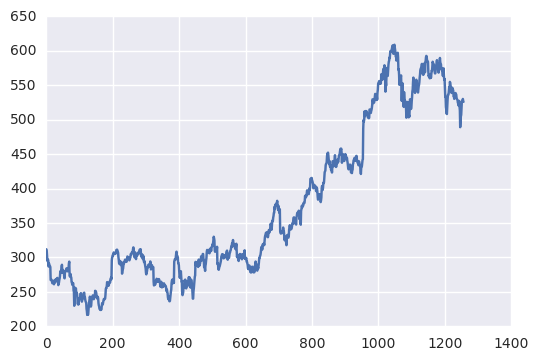

In [217]:
plt.plot(highs)

It's obvious we would want the dates along the x-axis, to see when the peak occurred. But doing that requires a bit more work.  It's simpler for us to do it using pandas, the next topic.  The convention is to import it as "pd":

In [43]:
import pandas as pd

In [227]:
# Pandas has built-in tools to read files, including csv and excel.
mydf = pd.read_csv("data/goog.csv")

In [228]:
mydf.head()  # this command shows us the result of the operation, with the top 5 rows of the table

,Date,Open,High,Low,Close,Volume
0,2010-01-04,313.16,314.44,311.81,313.06,NaN
1,2010-01-05,313.28,313.61,310.46,311.68,NaN
2,2010-01-06,312.62,312.62,302.88,303.83,NaN
3,2010-01-07,304.40,304.70,296.03,296.75,NaN
4,2010-01-08,295.70,301.32,294.26,300.71,NaN


In [229]:
type(mydf)

pandas.core.frame.DataFrame

The primary data type in pandas is a DataFrame.  It has a lot of things defined on it, including plotting commands:

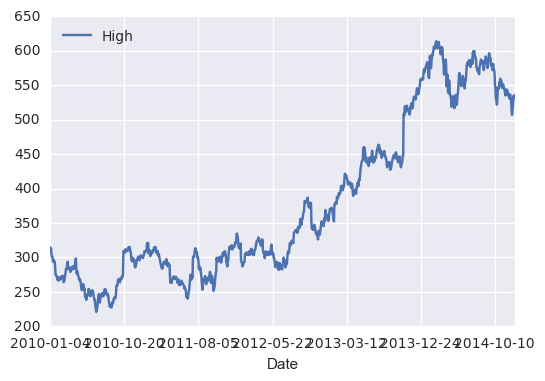

In [230]:
# To make a plot from pandas, we use the dataframe object we created, then tell the plot function
# what to use as the X column and what to use as the Y column.
mydf.plot("Date", "High")

In [231]:
mydf["Date"]

0       2010-01-04
1       2010-01-05
2       2010-01-06
3       2010-01-07
4       2010-01-08
5       2010-01-11
6       2010-01-12
7       2010-01-13
8       2010-01-14
9       2010-01-15
10      2010-01-19
11      2010-01-20
12      2010-01-21
13      2010-01-22
14      2010-01-25
15      2010-01-26
16      2010-01-27
17      2010-01-28
18      2010-01-29
19      2010-02-01
20      2010-02-02
21      2010-02-03
22      2010-02-04
23      2010-02-05
24      2010-02-08
25      2010-02-09
26      2010-02-10
27      2010-02-11
28      2010-02-12
29      2010-02-16
           ...    
1227    2014-11-18
1228    2014-11-19
1229    2014-11-20
1230    2014-11-21
1231    2014-11-24
1232    2014-11-25
1233    2014-11-26
1234    2014-11-28
1235    2014-12-01
1236    2014-12-02
1237    2014-12-03
1238    2014-12-04
1239    2014-12-05
1240    2014-12-08
1241    2014-12-09
1242    2014-12-10
1243    2014-12-11
1244    2014-12-12
1245    2014-12-15
1246    2014-12-16
1247    2014-12-17
1248    2014

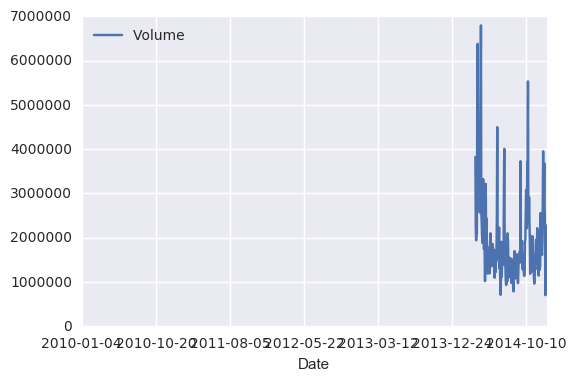

In [232]:
# If we plot volume, we can see how little data is there with volume, all at the end:
mydf.plot("Date", "Volume")

In [233]:
# there are some more useful functions for the new dataframe, which will help us 
# clean and check that data is valid.  .describe() does simple descriptive stats for the quantitative data.
mydf.describe()

,Open,High,Low,Close,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1.940000e+02
mean,375.275593,378.450247,372.132474,375.327064,1.937264e+06
std,115.684354,116.288827,114.935742,115.664301,9.842775e+05
min,218.940000,220.920000,216.600000,217.820000,7.040350e+05
25%,285.790000,288.760000,283.060000,285.450000,1.338451e+06
50%,318.330000,320.800000,315.180000,317.260000,1.684634e+06
75%,452.540000,456.020000,449.740000,452.830000,2.164369e+06
max,612.790000,613.830000,608.690000,609.470000,6.795393e+06


Now we can see the min and max, and check if we were right!

In [244]:
get_highest(mydata, 2)

613.83

We can also save out a csv file from pandas in a simple way.  What if we only wanted some of the columns? We can pick which ones to write out.


In [251]:
mydf.to_csv("data/saved_goog.csv")

In [250]:
ls data

goog.csv*       saved_good.csv  saved_goog.csv


In [252]:
mydf.to_csv("data/saved_goog_highs.csv", columns=["Date", "High"])

In [253]:
ls data

goog.csv*             saved_goog.csv
saved_good.csv        saved_goog_highs.csv


As is, this results in a file with the contents that start...:

````
,Date,High
0,2010-01-04,314.44
1,2010-01-05,313.61
2,2010-01-06,312.62
3,2010-01-07,304.7
4,2010-01-08,301.32
5,2010-01-11,301.93
6,2010-01-12,298.78
7,2010-01-13,293.9
8,2010-01-14,296.8
9,2010-01-15,296.48
````


If you don't want the extra index row with the rownumber and no header, you can prevent that from being saved by saying "index=None").


In [254]:
mydf.to_csv("data/saved_goog_highs.csv", columns=["Date", "High"], index=None)

### Homework 5

Use pandas to read in the csv file "more_data.csv" and show descriptive statistics with .describe().  Then plot the High Values by date as we did above.  Save out the file with just the High values and date, and no index column.

Your answer to q5: ------------------------

**NOTE: This should be easy. If you had troubles, come see me in office hours.  Some of you forgot the plot.**

In [45]:
mynewdf = pd.read_csv("data/more_data.csv")

In [47]:
mynewdf.describe()

,Open,High,Low,Close,Volume,Adj Close
count,999.000000,999.000000,999.000000,999.000000,9.990000e+02,999.000000
mean,1761.502572,1769.774335,1752.690392,1761.947428,3.497229e+09,1761.947428
std,270.196761,270.951764,268.876081,269.809105,6.299589e+08,269.809105
min,1277.819946,1282.550049,1266.739990,1278.040039,5.362000e+08,1278.040039
25%,1483.464966,1489.270019,1478.485046,1486.914978,3.126055e+09,1486.914978
50%,1822.920044,1833.319946,1815.800049,1826.770020,3.453590e+09,1826.770020
75%,2013.739990,2022.139954,1999.799988,2012.515015,3.801265e+09,2012.515015
max,2130.360107,2134.719971,2126.060059,2130.820068,6.683070e+09,2130.820068


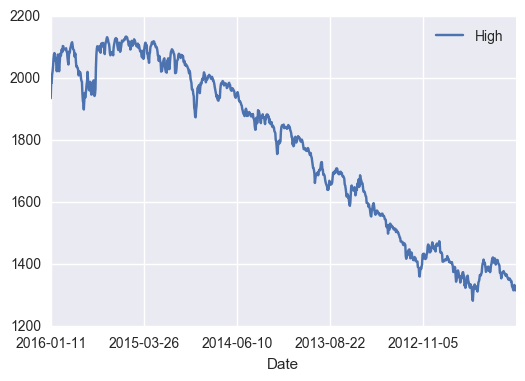

In [48]:
mynewdf.plot("Date", "High")

In [49]:
mynewdf.to_csv("data/new_highs.csv", columns=["Date","High"], index=None)

Moving on.... ----------------------

### Your reading for the week is the introductions to Pandas here:
    
* [Long Link Here](http://nbviewer.jupyter.org/urls/bitbucket.org/hrojas/learn-pandas/raw/master/lessons/01%20-%20Lesson.ipynb)
* [Another long link](http://nbviewer.jupyter.org/github/jvns/pandas-cookbook/blob/v0.1/cookbook/Chapter%201%20-%20Reading%20from%20a%20CSV.ipynb)
* And feel free to watch anything you want here: http://www.dataschool.io/easier-data-analysis-with-pandas/
        
